Modify the Logistic Regression scratch code in our lecture so that it works with multiclass problem.  Attempt to load the iris data and apply your code with it.

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept

#make sure our y is in the shape of (n, k)
#we will convert our output vector in 
#matrix where no of columns is equal to the no of classes. 
#The values in the matrix will be 0 or 1. For instance the rows 
#where we have output 2 the column 2 will contain 1 and rest all 0.
#in simple words, y will be of shape (m, k)
k = len(set(y))  #no. of class  (can also use np.unique)
m = X_train.shape[0]  #no.of samples
n = X_train.shape[1]  #no. of features
y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    y_train_encoded[np.where(cond), each_class] = 1

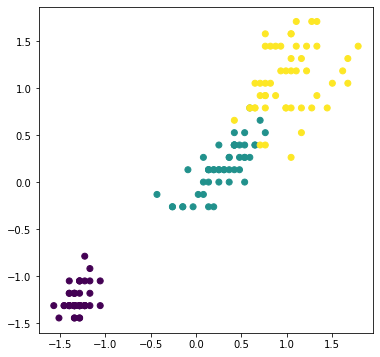

In [2]:
#Step 1.1 (optional): Visualize our data

#your code here
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [3]:
#Step 2: Fit your data

def logistic_regression_GD(X, y, k, n, max_iter=1000):
    '''
    Inputs: 
        X shape: (m, n)
        w shape: (n, k)
    '''
    w = np.random.rand(n, k)
    l_rate = 0.01
    for i in range(max_iter):
        cost, grad =  gradient(X, y, w)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        w = w - l_rate * grad
    return w, i

#for those who tend to feel overwhelmed with lots of code
#I recommend you to write each part of the code separately as function
#it helps!
def gradient(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    cost = -np.sum(y*np.log(h))/m
    error = h - y
    grad = softmax_grad(X, error)
    return cost, grad

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def softmax_grad(X, error):
    return  X.T @ error
        
def h_theta(X, w):
    '''
    Input:
        X shape: (m, n)
        w shape: (n, k)
    Returns:
        yhat shape: (m, k)
    '''
    return softmax(X @ w)

w, i = logistic_regression_GD(X_train, y_train_encoded, k, X_train.shape[1], max_iter=5000)

Cost at iteration 0 1.0497390144305527
Cost at iteration 500 0.08428505915487199
Cost at iteration 1000 0.07624907439318684
Cost at iteration 1500 0.07329702973207879
Cost at iteration 2000 0.07184011414757217
Cost at iteration 2500 0.07101632423176729
Cost at iteration 3000 0.07050930043849601
Cost at iteration 3500 0.07017796239276329
Cost at iteration 4000 0.06995127115040832
Cost at iteration 4500 0.06979029002320104


In [4]:
from sklearn.metrics import classification_report

yhat = np.argmax(h_theta(X_test, w), axis=1)
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Average precision score.  Recall that in a multiclass format, we have to calculate for each class, and then take the average.  And before we do that, we need to binarize our y.

In [5]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score

print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
yhat_binarized = label_binarize(yhat, classes=[0, 1, 2])

n_classes = len(np.unique(y_test))

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)

=========Average precision score=======
Class 0 score:  1.0
Class 1 score:  0.875
Class 2 score:  0.9267973856209151
